## Pruebas

In [1]:
%pylab inline

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


In [2]:
#products = pd.read_csv('products_clean.csv')
#sales = pd.read_csv('sales_clean.csv')
#stock = pd.read_csv('stock_clean.csv')
sales_prod = pd.read_csv('sp_clean.csv')
#stock_prod = pd.read_csv('stp_clean.csv')
#groupby_sales = pd.read_csv('gb_sales_clean.csv')
#subcategories_list = pd.read_csv('subc_list_clean.csv')
#materials_list = pd.read_csv('mat_list_clean.csv')

## MODELOS ML

In [3]:
import time

import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import seaborn as sns


from datetime import datetime
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

In [4]:
pd.set_option('display.max_columns', None)
sales_prod.head(1)

,Unnamed: 0,ID,NRO_DOCUMENTO,FECHA,CODIGO_TIENDA,TIENDA,PROD_REF,CANTIDAD,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL,ANIO,MES,DIA,ITEM,REF,DESCRIPCION,CATEGORIA,SUBCATEGORIA,VIGENCIA,ORIGEN,ESTILO,MATERIAL,ACABADO,PUESTOS,COLOR,ANCHO,ALTO,FONDO,DESC_LARGA,SUBCATEGORIA_POS,COLOR_POS,MATERIAL_POS
0,0,11:FSV-00001071:XZ0862:00005:,FSV-00001071,2019-01-17,11,ADMINISTRACION,XZ0862:00005:,1,188922.0,188922,0.599999,75569,2019,1,3,6084,XZ0862:00005:,MESA AUX LAUREL,SALAS Y SOFAS,MESAS AUXILIARES,LINEA,IMPORTADO,CONTEMPORÁNEO,MADERA+VIDRIO,MATE,NaN,NEGRO,40.0,45.0,40.0,MESA AUXILIAR LAUREL 39X40X50 CRISTAL NG,OTROS,NEGRO,OTRO


In [5]:
sales_prod['AREA']=sales_prod['ANCHO']*sales_prod['FONDO']

In [6]:
sales_prod['PUESTOS'].fillna(0,inplace=True)

In [7]:

columns_HD = ['REF','TIENDA', 'PRECIO', 'SUBTOTAL','DESCUENTO(%)','TOTAL','CANTIDAD','ANIO','MES','CATEGORIA','SUBCATEGORIA','VIGENCIA','ORIGEN','ESTILO','MATERIAL','ACABADO','COLOR','ALTO','AREA','PUESTOS']
columns_LD= ['REF','TIENDA', 'PRECIO', 'SUBTOTAL','DESCUENTO(%)','TOTAL','CANTIDAD','ANIO','MES','CATEGORIA','SUBCATEGORIA_POS','VIGENCIA','ORIGEN','ESTILO','MATERIAL_POS','ACABADO','COLOR_POS','ALTO','AREA','PUESTOS']

In [8]:
sales_prod_HD=sales_prod[columns_HD]
sales_prod_LD=sales_prod[columns_LD]

<AxesSubplot:>

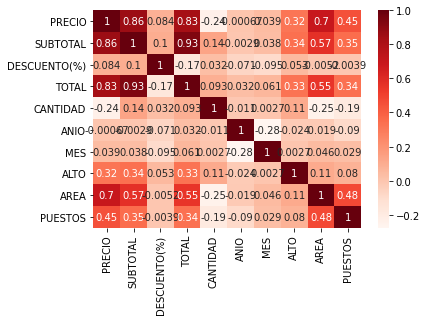

In [9]:
sns.heatmap(sales_prod_HD.corr(),cmap='Reds',annot=True)

sacar precio afuera?

In [10]:
sales_prod_LD

,REF,TIENDA,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL,CANTIDAD,ANIO,MES,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,COLOR_POS,ALTO,AREA,PUESTOS
0,XZ0862:00005:,ADMINISTRACION,188922.0,188922,0.599999,75569,1,2019,1,SALAS Y SOFAS,OTROS,LINEA,IMPORTADO,CONTEMPORÁNEO,OTRO,MATE,NEGRO,45.0,1600.0,0.0
1,XZ0862:00005:,PUNTO DE VENTA AV 68,188922.0,188922,0.649998,66123,1,2019,11,SALAS Y SOFAS,OTROS,LINEA,IMPORTADO,CONTEMPORÁNEO,OTRO,MATE,NEGRO,45.0,1600.0,0.0
2,XZ0862:00005:,PUNTO DE VENTA LAURELES,188922.0,188922,0.599999,75569,1,2019,1,SALAS Y SOFAS,OTROS,LINEA,IMPORTADO,CONTEMPORÁNEO,OTRO,MATE,NEGRO,45.0,1600.0,0.0
3,XZ0862:00005:,PUNTO DE VENTA BUCARAMANGA,33778.0,33778,0.000000,33778,1,2019,4,SALAS Y SOFAS,OTROS,LINEA,IMPORTADO,CONTEMPORÁNEO,OTRO,MATE,NEGRO,45.0,1600.0,0.0
4,XZ0862:00005:,PUNTO DE VENTA CALI,188922.0,188922,0.599999,75569,1,2019,3,SALAS Y SOFAS,OTROS,LINEA,IMPORTADO,CONTEMPORÁNEO,OTRO,MATE,NEGRO,45.0,1600.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36175,D00514:00141:00141,PAGINA WEB FIOTTI,1662960.0,1662960,0.000000,1662960,1,2019,8,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,CLÁSICO,MICROFIBRA,TEXTILES SUAVES,CAFE,93.0,40670.0,3.0
36176,D00077:00124:00124,PAGINA WEB FIOTTI,454661.0,454661,0.450102,250017,1,2020,7,ALCOBAS,OTROS,NOVEDAD,MANUFACTURADO,CONTEMPORÁNEO,MICROFIBRA,TEXTILES SUAVES,GRIS,120.0,2040.0,0.0
36177,D00140:00021:,PAGINA WEB FIOTTI,318969.0,318969,0.544965,145142,1,2020,10,SALAS Y SOFAS,OTROS,DESCONTINUADO,NACIONAL,MODERNO,VIDRIO,BRILLANTE,OTRO,60.0,1600.0,0.0
36178,D00140:00021:,PAGINA WEB FIOTTI,188840.0,188840,0.000000,188840,1,2021,1,SALAS Y SOFAS,OTROS,DESCONTINUADO,NACIONAL,MODERNO,VIDRIO,BRILLANTE,OTRO,60.0,1600.0,0.0


**Solo por producto**

In [206]:
sales_ref_month=sales_prod_LD.groupby(['ANIO','MES','REF']).agg({'PRECIO':'mean','SUBTOTAL':'sum','DESCUENTO(%)':'mean','TOTAL':'sum','CANTIDAD':'sum','ALTO':'first','AREA':'first','PUESTOS':'first','COLOR_POS':'first','CATEGORIA':'first','SUBCATEGORIA_POS':'first','VIGENCIA':'first','ORIGEN':'first','ESTILO':'first','MATERIAL_POS':'first','ACABADO':'first'}).reset_index().sort_values(by=['ANIO','MES'])

In [207]:
covid=sales_ref_month[['ANIO','MES']].drop_duplicates().reset_index(drop=True)
aux2=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,3,1,1,1,2,2,1,1,2,2,1,1,1]

In [208]:
covid['Factor covid']=aux2


In [209]:
sales_ref_month=sales_ref_month.merge(covid,on=['ANIO','MES'])

<AxesSubplot:>

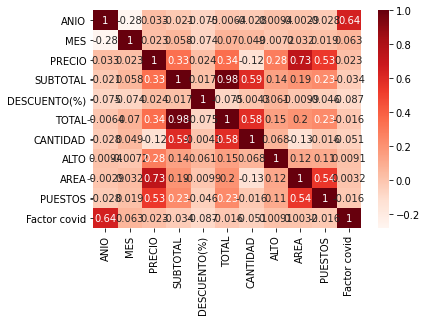

In [210]:
sns.heatmap(sales_ref_month.corr(),cmap='Reds',annot=True)

AREA PRIMERO

In [211]:
num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO','CANTIDAD',]
cat_var=['MES','Factor covid','PUESTOS','COLOR_POS','CATEGORIA','SUBCATEGORIA_POS','VIGENCIA','ORIGEN','ESTILO','MATERIAL_POS','ACABADO']

In [212]:
y=sales_ref_month['CANTIDAD']

In [213]:
X_num=sales_ref_month[num_var[:-1]].astype('float')
X_cat=sales_ref_month[cat_var].astype('category')

In [214]:
X_cat_dummies=pd.get_dummies(X_cat)

In [215]:
from sklearn.preprocessing import MinMaxScaler

In [216]:
scaler=MinMaxScaler()
X_num_norm= scaler.fit_transform(X_num)


In [217]:
X=np.append(X_num_norm,X_cat_dummies,axis=1)

In [218]:
#split data till januar 2021
index=sales_ref_month[(sales_ref_month.ANIO==2021)].index[0]
X_train=X[:index]
y_train=y[:index]
X_test=X[index:]
y_test=y[index:]


In [219]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

In [220]:
mod = sm.OLS(y_train, sm.add_constant(X_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CANTIDAD   R-squared:                       0.168
Model:                            OLS   Adj. R-squared:                  0.161
Method:                 Least Squares   F-statistic:                     24.20
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          3.17e-277
Time:                        04:38:21   Log-Likelihood:                -29381.
No. Observations:                8442   AIC:                         5.890e+04
Df Residuals:                    8371   BIC:                         5.940e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.364e+12    1.1e+13      0.307      0.759   -1.81e+13    2.49e+13
x1             1.6832      1.450      1.161      0.246      -1.160       4.526
x2             2.6362      1.141      2.311      0.021       0.400       4.873
x3             0.8718      0.515      1.692      0.091      -0.138       1.882
x4            -7.6983      1.422     -5.412      0.000     -10.487      -4.910
x5          4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x6          4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x7          4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x8          4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x9          4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x10         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x11         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x12         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x13         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x14         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x15         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x16         4.231e+11   1.38e+12      0.307      0.759   -2.28e+12    3.13e+12
x17         2.001e+12   6.53e+12      0.307      0.759   -1.08e+13    1.48e+13
x18         2.001e+12   6.53e+12      0.307      0.759   -1.08e+13    1.48e+13
x19         2.001e+12   6.53e+12      0.307      0.759   -1.08e+13    1.48e+13
x20         2.001e+12   6.53e+12      0.307      0.759   -1.08e+13    1.48e+13
x21         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x22         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x23         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x24         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x25         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x26         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x27         3.217e+11   1.05e+12      0.307      0.759   -1.74e+12    2.38e+12
x28          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x29          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x30          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x31          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x32          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x33          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x34          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x35          4.03e+11   1.31e+12      0.307      0.759   -2.17e+12    2.98e+12
x3

In [221]:
X_test

array([[0.03233414, 0.85365854, 0.48767181, ..., 0.        , 0.        ,
        0.        ],
       [0.03233414, 0.85365854, 0.45823132, ..., 0.        , 0.        ,
        0.        ],
       [0.12021954, 0.35121951, 0.45640753, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21624153, 0.34146341, 0.46144365, ..., 0.        , 0.        ,
        0.        ],
       [0.13032711, 0.34146341, 0.4561987 , ..., 0.        , 0.        ,
        0.        ],
       [0.07305084, 0.1902439 , 0.62539433, ..., 0.        , 0.        ,
        0.        ]])

In [222]:
y_predicted=res.predict(sm.add_constant(X_test))
mse(y_test,y_predicted)

26.892671079283247

In [223]:
y_test

8442    2
8443    1
8444    1
8445    1
8446    2
       ..
9800    1
9801    2
9802    2
9803    1
9804    3
Name: CANTIDAD, Length: 1363, dtype: int64

In [224]:
y_predicted

array([ 5.1309967 ,  5.1075592 ,  3.63587952, ..., -0.77149963,
       -1.2848053 , -0.96144104])

In [30]:
from sklearn.ensemble import GradientBoostingRegressor

In [225]:
br=GradientBoostingRegressor(**{'learning_rate': 1,
'max_depth': 2,
'min_samples_split': 5,
'n_estimators': 200})

In [226]:
br.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=1, max_depth=2, min_samples_split=5,
                          n_estimators=200)

In [227]:
br.predict(X_test)

array([ 5.0051742 ,  5.86168801,  1.68356284, ..., 16.82595146,
       -2.12695533,  6.53616142])

In [228]:
y_test

8442    2
8443    1
8444    1
8445    1
8446    2
       ..
9800    1
9801    2
9802    2
9803    1
9804    3
Name: CANTIDAD, Length: 1363, dtype: int64

In [229]:
from sklearn.metrics import mean_squared_error as mse
mse(br.predict(X_test),y_test)

50.067895327498206

In [36]:
from sklearn.metrics import r2_score as r2
r2(br.predict(X_test),y_test)

-0.10261031856825031

In [37]:
list(zip(X_num.columns.append(X_cat_dummies.columns),br.feature_importances_))

[('AREA', 0.026196957686737632),
 ('ALTO', 0.034183109841994644),
 ('DESCUENTO(%)', 0.3393198207500696),
 ('PRECIO', 0.16745764627801493),
 ('MES_1', 0.0023592261785315813),
 ('MES_2', 0.014120905620486408),
 ('MES_3', 0.0013305821972713972),
 ('MES_4', 0.004164748318892774),
 ('MES_5', 0.0007244385930002361),
 ('MES_6', 0.0008881084366928706),
 ('MES_7', 0.0012152615578172863),
 ('MES_8', 0.0005350195248961317),
 ('MES_9', 0.00018763044516806907),
 ('MES_10', 0.00043624631852374075),
 ('MES_11', 0.005291084564916203),
 ('MES_12', 0.0030814063622927154),
 ('Factor covid_0', 0.005778878583466743),
 ('Factor covid_1', 0.0008248266566393813),
 ('Factor covid_2', 0.00010026580760415247),
 ('Factor covid_3', 0.000273399748925719),
 ('PUESTOS_0.0', 0.0),
 ('PUESTOS_1.0', 0.007733939491327909),
 ('PUESTOS_2.0', 0.0),
 ('PUESTOS_3.0', 0.0),
 ('PUESTOS_4.0', 0.005276748376289456),
 ('PUESTOS_6.0', 0.0),
 ('PUESTOS_7.0', 0.0),
 ('COLOR_POS_AMARILLO', 5.790277860766135e-05),
 ('COLOR_POS_AZUL', 0

In [230]:
param_dist = {'n_estimators':[30, 40, 100, 200, 300, 500],'learning_rate':[0.01, 0.05, 0.1, 0.3, 0.4, 1], 'max_depth': [2,4,6,8,10]}

In [231]:
grid_clf_br = GridSearchCV(GradientBoostingRegressor(), param_grid = param_dist,cv=3,n_jobs=4,scoring='neg_mean_squared_error')
grid_clf_br.fit(X_train, y_train)


KeyboardInterrupt: 

In [ ]:
grid_clf_br.best_params_

In [ ]:
grid_clf_br.best_score_

In [44]:
best={'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30}

In [45]:
br2=GradientBoostingRegressor(**best)

In [232]:
br2.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=4, n_estimators=30)

In [233]:
mse(br2.predict(X_test),y_test)

28.467165980395798

In [234]:
br2.predict(X_test)

array([4.34801661, 4.87974489, 4.8922676 , ..., 5.26897362, 3.9810233 ,
       4.38234449])

In [49]:
y_test

8442    2
8443    1
8444    1
8445    1
8446    2
       ..
9800    1
9801    2
9802    2
9803    1
9804    3
Name: CANTIDAD, Length: 1363, dtype: int64

In [50]:
import sklearn

In [51]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

Lasso o Ridge?

In [235]:
from sklearn.linear_model import Ridge, Lasso

In [236]:
rr=Ridge(alpha=1000)
rr.fit(X_train,y_train)
mse(y_test,rr.predict(X_test))


23.49938918752177

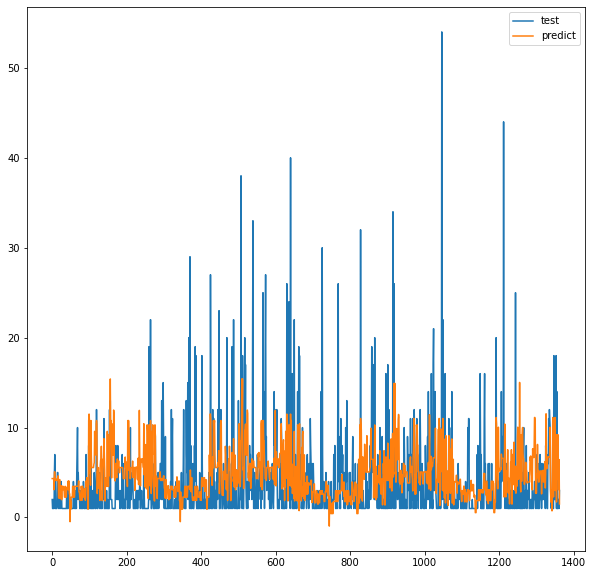

In [238]:
plt.figure(figsize=(10,10))
plt.plot(range(len(rr.predict(X_test))),y_test,label='test')
plt.plot(range(len(rr.predict(X_test))),rr.predict(X_test),label='predict')
plt.legend()

In [237]:
rr=Lasso(alpha=0.0555)
rr.fit(X_train,y_train)
mse(y_test,rr.predict(X_test))


23.712866150977607

again but scaling numerical features

In [55]:
from scipy import stats

In [56]:
X_num['DESCUENTO(%)']=X_num['DESCUENTO(%)']+0.00001
num_columns=['AREA','ALTO','DESCUENTO(%)','PRECIO'] #Descuento no se puede porque tiene 0
X_num_tran=pd.DataFrame()
lambdas=[]
for column in num_columns:
    aux=stats.boxcox(X_num[column])
    X_num_tran["{}_TRANSFORMADO".format(column)]=aux[0]
    lambdas.append(aux[1])
    print (column,aux[1])
y_trans=stats.boxcox(y)[0]
print(y.name,stats.boxcox(y)[1])

AREA 0.09462246239528119
ALTO 0.5600153418213141
DESCUENTO(%) 0.8995044971685335
PRECIO 0.11425933963035825
CANTIDAD -0.3883700581749616


In [59]:
X_num_norm2= scaler.fit_transform(X_num_tran)
y_norm2=scaler.fit_transform(y.values.reshape(-1,1))

#X=np.append(X_num_norm2,X_cat_dummies,axis=1)
X=pd.concat([X_num_tran,X_cat_dummies],axis=1)
#split data till januar 2021
index=sales_ref_month[sales_ref_month.ANIO==2021].index[0]
X_train=X[:index]
y_train=y[:index]
X_test=X[index:]
y_test=y[index:]

import statsmodels.api as sm

mod = sm.OLS(y_train, sm.add_constant(X_train))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CANTIDAD   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.165
Method:                 Least Squares   F-statistic:                     24.76
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          5.02e-284
Time:                        03:43:37   Log-Likelihood:                -29365.
No. Observations:                8442   AIC:                         5.887e+04
Df Residuals:                    8371   BIC:                         5.937e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   4.6947      0.801      5.861      0.000       3.124       6.265
AREA_TRANSFORMADO                       0.2604      0.118      2.212      0.027       0.030       0.491
ALTO_TRANSFORMADO                       0.1136      0.040      2.835      0.005       0.035       0.192
DESCUENTO(%)_TRANSFORMADO               1.6980      0.552      3.079      0.002       0.617       2.779
PRECIO_TRANSFORMADO                    -0.4433      0.056     -7.893      0.000      -0.553      -0.333
MES_1                                   0.5895      0.301      1.961      0.050       0.000       1.179
MES_2                                   0.3201      0.291      1.101      0.271      -0.250       0.890
MES_3                                  -0.7174      0.360     -1.993      0.046      -1.423      -0.012
MES_4                                  -1.1537      0.379     -3.047      0.002      -1.896      -0.411
MES_5                                  -0.2312      0.354     -0.653      0.514      -0.925       0.463
MES_6                                   0.8550      0.313      2.736      0.006       0.242       1.468
MES_7                                   1.0124      0.301      3.361      0.001       0.422       1.603
MES_8                                  -0.2631      0.320     -0.822      0.411      -0.890       0.364
MES_9                                   0.5593      0.315      1.775      0.076      -0.058       1.177
MES_10                                  0.4509      0.299      1.509      0.131      -0.135       1.037
MES_11                                  2.1457      0.285      7.525      0.000       1.587       2.705
MES_12                                  1.1272      0.314      3.591      0.000       0.512       1.743
Factor covid_0                          2.0225      0.256      7.889      0.000       1.520       2.525
Factor covid_1                          0.7572      0.324      2.335      0.020       0.121       1.393
Factor covid_2                          1.1635      0.356      3.270      0.001       0.466       1.861
Factor covid_3                          0.7515      0.466      1.613      0.107      -0.162       1.665
PUESTOS_0.0                            -1.9250      0.571     -3.373      0.001      -3.044      -0.806
PUESTOS_1.0                             1.8859      0.872      2.162      0.031       0.176       3.596
PUESTOS_2.0                             1.1497      0.623      1.846      0.065      -0.071       2.371
PUESTOS_3.0                             1.5399      0.622      2.475      0.013       0.320       2.760
PUESTOS_4.0                             1.1293      0.935      1.208      0.227      -0.704       2.962
PUESTOS_6.0                            -1.7491      0.704     -2.48

In [60]:
res2=res.predict(sm.add_constant(X_test))

In [61]:
mse(y_test,res2)

26.880305646353474

In [62]:
y_test

8442    2
8443    1
8444    1
8445    1
8446    2
       ..
9800    1
9801    2
9802    2
9803    1
9804    3
Name: CANTIDAD, Length: 1363, dtype: int64

In [63]:
res2

8442    5.011149
8443    4.972421
8444    3.339692
8445    5.751909
8446    3.553004
          ...   
9800    8.002247
9801    0.822401
9802   -1.259426
9803   -1.083101
9804   -1.875932
Length: 1363, dtype: float64

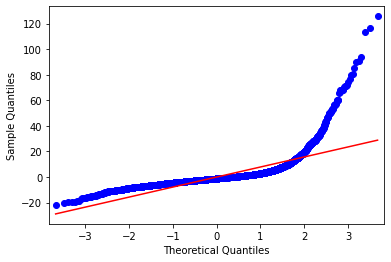

In [64]:
sm.qqplot(res.resid, line="s");

In [65]:
from sklearn.metrics import mean_squared_error as mse

malos modelos....

probemos laggy sales variables

In [66]:
sales_ref_month

,ANIO,MES,REF,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL,CANTIDAD,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,Factor covid
0,2019,1,D00510:00079:00079,8.156132e+05,4078066,0.328536,2674534,5,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
1,2019,1,D00510:00080:00080,8.544160e+05,854416,0.410670,503533,1,90.0,26390.0,3.0,BLANCO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
2,2019,1,D00510:00112:00112,1.050933e+06,1050933,0.500000,525466,1,90.0,26390.0,3.0,CAFE,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
3,2019,1,D00511:00079:00079,8.544160e+05,1708832,0.410670,1007066,2,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,SINTÉTICO,TEXTILES SUAVES,0
4,2019,1,D00511:00130:00130,1.050932e+06,1050932,0.000000,1050932,1,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,2021,4,XZ0848:00009:,1.774400e+05,177440,0.579835,74554,1,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1
9801,2021,4,XZ0861:00026:,4.902860e+05,980572,0.642260,350790,2,120.0,1794.0,0.0,CRISTAL,ESTUDIO,OTROS,DESCONTINUADO,IMPORTADO,MODERNO,MADERA LAMINADA,MATE,1
9802,2021,4,XZ0897:00044:,1.124460e+06,2248919,0.395364,1360113,2,75.0,13500.0,6.0,OTRO,COMEDORES,OTROS,LINEA,IMPORTADO,MODERNO,VIDRIO,BRILLANTE,1
9803,2021,4,XZ0914-1:00001:,1.984260e+06,1984260,0.390870,1208672,1,75.0,8400.0,6.0,BLANCO,COMEDORES,SET 6P,LINEA,IMPORTADO,CLÁSICO,METAL + VIDRIO,MATE,1


In [67]:
sales_ref_month.groupby('REF')['CANTIDAD'].shift(1)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
9800    11.0
9801     1.0
9802     4.0
9803     1.0
9804     1.0
Name: CANTIDAD, Length: 9805, dtype: float64

In [68]:
sales_ref_month[sales_ref_month['REF']=='XZ0848:00009:']

,ANIO,MES,REF,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL,CANTIDAD,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,Factor covid
1050,2019,3,XZ0848:00009:,149147.5,596590,0.700000,178977,4,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0
1796,2019,5,XZ0848:00009:,149147.5,596590,0.350001,387783,4,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0
8028,2020,11,XZ0848:00009:,149109.5,596438,0.600000,238575,4,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1
9102,2021,2,XZ0848:00009:,161869.5,323739,0.493731,163899,2,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1
9507,2021,3,XZ0848:00009:,177440.0,1951840,0.524255,938439,11,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1
9800,2021,4,XZ0848:00009:,177440.0,177440,0.579835,74554,1,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1


In [69]:
pivot=pd.pivot_table(sales_ref_month,index=['ANIO','REF'],columns='MES',values='CANTIDAD')
pivot

MES                       1     2     3    4    5    6    7    8    9    10  \
ANIO REF                                                                      
2019 A01040:00005:       NaN  14.0  24.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     D00006:00120:00120  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     D00008:00120:00120  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     D00008:00124:00124  NaN   NaN   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     D00010:00015:       NaN   NaN   NaN  1.0  2.0  2.0  2.0  2.0  3.0  1.0   
...                      ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
2021 XZ0932:00138:       NaN   NaN   2.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     XZ0934:00137:       2.0   1.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     XZ0972:00024:       NaN   NaN   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     XZ0973:00046:       NaN   2.0   1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
     XZ0993:00100:       NaN   2.0   1.0  3.0  NaN  NaN  NaN  NaN  NaN  NaN   

MES                       11   12  
ANIO REF                           
2019 A01040:00005:       NaN  NaN  
     D00006:00120:00120  4.0  6.0  
     D00008:00120:00120  7.0  3.0  
     D00008:00124:00124  7.0  4.0  
     D00010:00015:       3.0  2.0  
...                      ...  ...  
2021 XZ0932:00138:       NaN  NaN  
     XZ0934:00137:       NaN  NaN  
     XZ0972:00024:       NaN  NaN  
     XZ0973:00046:       NaN  NaN  
     XZ0993:00100:       NaN  NaN  

[2385 rows x 12 columns]

In [70]:
pivot.reset_index()[pivot.reset_index()['REF']=='XZ0848:00009:']

MES,ANIO,REF,1,2,3,4,5,6,7,8,9,10,11,12
868,2019,XZ0848:00009:,NaN,NaN,4.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740,2020,XZ0848:00009:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2359,2021,XZ0848:00009:,NaN,2.0,11.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [109]:
pivot.reset_index()[pivot.reset_index()['REF']=='A01040:00005:']

MES,ANIO,REF,1,2,3,4,5,6,7,8,9,10,11,12
0,2019,A01040:00005:,NaN,14.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
pivote=pivot.fillna(0)

In [72]:
pivote.reset_index()

MES,ANIO,REF,1,2,3,4,5,6,7,8,9,10,11,12
0,2019,A01040:00005:,0.0,14.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2019,D00006:00120:00120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,6.0
2,2019,D00008:00120:00120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,3.0
3,2019,D00008:00124:00124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,4.0
4,2019,D00010:00015:,0.0,0.0,0.0,1.0,2.0,2.0,2.0,2.0,3.0,1.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2021,XZ0932:00138:,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2381,2021,XZ0934:00137:,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2382,2021,XZ0972:00024:,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2383,2021,XZ0973:00046:,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
unpivote=pivote.reset_index().melt(id_vars=['ANIO','REF'],var_name='MES',value_name='CANTIDAD')
unpivote

,ANIO,REF,MES,CANTIDAD
0,2019,A01040:00005:,1,0.0
1,2019,D00006:00120:00120,1,0.0
2,2019,D00008:00120:00120,1,0.0
3,2019,D00008:00124:00124,1,0.0
4,2019,D00010:00015:,1,0.0
...,...,...,...,...
28615,2021,XZ0932:00138:,12,0.0
28616,2021,XZ0934:00137:,12,0.0
28617,2021,XZ0972:00024:,12,0.0
28618,2021,XZ0973:00046:,12,0.0


In [74]:
sales_ref_month

,ANIO,MES,REF,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL,CANTIDAD,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,Factor covid
0,2019,1,D00510:00079:00079,8.156132e+05,4078066,0.328536,2674534,5,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
1,2019,1,D00510:00080:00080,8.544160e+05,854416,0.410670,503533,1,90.0,26390.0,3.0,BLANCO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
2,2019,1,D00510:00112:00112,1.050933e+06,1050933,0.500000,525466,1,90.0,26390.0,3.0,CAFE,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
3,2019,1,D00511:00079:00079,8.544160e+05,1708832,0.410670,1007066,2,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,SINTÉTICO,TEXTILES SUAVES,0
4,2019,1,D00511:00130:00130,1.050932e+06,1050932,0.000000,1050932,1,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9800,2021,4,XZ0848:00009:,1.774400e+05,177440,0.579835,74554,1,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,1
9801,2021,4,XZ0861:00026:,4.902860e+05,980572,0.642260,350790,2,120.0,1794.0,0.0,CRISTAL,ESTUDIO,OTROS,DESCONTINUADO,IMPORTADO,MODERNO,MADERA LAMINADA,MATE,1
9802,2021,4,XZ0897:00044:,1.124460e+06,2248919,0.395364,1360113,2,75.0,13500.0,6.0,OTRO,COMEDORES,OTROS,LINEA,IMPORTADO,MODERNO,VIDRIO,BRILLANTE,1
9803,2021,4,XZ0914-1:00001:,1.984260e+06,1984260,0.390870,1208672,1,75.0,8400.0,6.0,BLANCO,COMEDORES,SET 6P,LINEA,IMPORTADO,CLÁSICO,METAL + VIDRIO,MATE,1


In [75]:
sales_ref_month.columns.drop('SUBTOTAL')

Index(['ANIO', 'MES', 'REF', 'PRECIO', 'DESCUENTO(%)', 'TOTAL', 'CANTIDAD',
       'ALTO', 'AREA', 'PUESTOS', 'COLOR_POS', 'CATEGORIA', 'SUBCATEGORIA_POS',
       'VIGENCIA', 'ORIGEN', 'ESTILO', 'MATERIAL_POS', 'ACABADO',
       'Factor covid'],
      dtype='object')

In [84]:
aux=sales_ref_month[['ANIO','MES','REF']].merge(unpivote,on=['ANIO','REF','MES'],how='right')
aux

,ANIO,MES,REF,CANTIDAD
0,2019,1.0,A01040:00005:,0.0
1,2019,1.0,D00006:00120:00120,0.0
2,2019,1.0,D00008:00120:00120,0.0
3,2019,1.0,D00008:00124:00124,0.0
4,2019,1.0,D00010:00015:,0.0
...,...,...,...,...
28615,2021,12.0,XZ0932:00138:,0.0
28616,2021,12.0,XZ0934:00137:,0.0
28617,2021,12.0,XZ0972:00024:,0.0
28618,2021,12.0,XZ0973:00046:,0.0


In [77]:
ref_des=sales_ref_month.drop(['ANIO','MES','Factor covid','PRECIO','SUBTOTAL','DESCUENTO(%)','TOTAL','CANTIDAD'],axis=1)
ref_des

,REF,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO
0,D00510:00079:00079,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES
1,D00510:00080:00080,90.0,26390.0,3.0,BLANCO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES
2,D00510:00112:00112,90.0,26390.0,3.0,CAFE,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES
3,D00511:00079:00079,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,SINTÉTICO,TEXTILES SUAVES
4,D00511:00130:00130,90.0,26390.0,3.0,NEGRO,SALAS Y SOFAS,OTROS,LINEA,MANUFACTURADO,MODERNO,OTRO,TEXTILES SUAVES
...,...,...,...,...,...,...,...,...,...,...,...,...
9800,XZ0848:00009:,96.0,1764.0,1.0,CAFE,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES
9801,XZ0861:00026:,120.0,1794.0,0.0,CRISTAL,ESTUDIO,OTROS,DESCONTINUADO,IMPORTADO,MODERNO,MADERA LAMINADA,MATE
9802,XZ0897:00044:,75.0,13500.0,6.0,OTRO,COMEDORES,OTROS,LINEA,IMPORTADO,MODERNO,VIDRIO,BRILLANTE
9803,XZ0914-1:00001:,75.0,8400.0,6.0,BLANCO,COMEDORES,SET 6P,LINEA,IMPORTADO,CLÁSICO,METAL + VIDRIO,MATE


In [90]:
sales=sales_ref_month[['REF','ANIO','MES','PRECIO','SUBTOTAL','DESCUENTO(%)','TOTAL']]
sales

,REF,ANIO,MES,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL
0,D00510:00079:00079,2019,1,8.156132e+05,4078066,0.328536,2674534
1,D00510:00080:00080,2019,1,8.544160e+05,854416,0.410670,503533
2,D00510:00112:00112,2019,1,1.050933e+06,1050933,0.500000,525466
3,D00511:00079:00079,2019,1,8.544160e+05,1708832,0.410670,1007066
4,D00511:00130:00130,2019,1,1.050932e+06,1050932,0.000000,1050932
...,...,...,...,...,...,...,...
9800,XZ0848:00009:,2021,4,1.774400e+05,177440,0.579835,74554
9801,XZ0861:00026:,2021,4,4.902860e+05,980572,0.642260,350790
9802,XZ0897:00044:,2021,4,1.124460e+06,2248919,0.395364,1360113
9803,XZ0914-1:00001:,2021,4,1.984260e+06,1984260,0.390870,1208672


In [101]:
aux3=aux.merge(ref_des,on='REF').merge(covid,on=['ANIO','MES']).merge(sales,on=['REF','ANIO','MES'],how='left')
aux3['PRECIO']=aux3.groupby('REF')['PRECIO'].apply(lambda group: group.interpolate(method='index').ffill().bfill())
aux3['DESCUENTO(%)']=aux3.groupby('REF')['DESCUENTO(%)'].apply(lambda group: group.interpolate(method='index').ffill().bfill())
aux3['SUBTOTAL']=aux3['PRECIO']*aux3['CANTIDAD']
aux3['TOTAL']=aux3['SUBTOTAL']-aux3['SUBTOTAL']*aux3['DESCUENTO(%)']
aux3=aux3.round(2)


In [107]:
aux3[aux3['REF']=='A01040:00005:']

,ANIO,MES,REF,CANTIDAD,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,Factor covid,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL
0,2019,1.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00
1,2019,1.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00
8101,2019,2.0,A01040:00005:,14.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,2032943.11,0.65,711529.78
8102,2019,2.0,A01040:00005:,14.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,2032943.11,0.65,711529.78
16202,2019,3.0,A01040:00005:,24.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,3485045.20,0.65,1219765.60
16203,2019,3.0,A01040:00005:,24.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,3485045.20,0.65,1219765.60
24303,2019,4.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00
24304,2019,4.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00
32404,2019,5.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00
32405,2019,5.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.00,0.65,0.00


In [108]:
aux3

,ANIO,MES,REF,CANTIDAD,ALTO,AREA,PUESTOS,COLOR_POS,CATEGORIA,SUBCATEGORIA_POS,VIGENCIA,ORIGEN,ESTILO,MATERIAL_POS,ACABADO,Factor covid,PRECIO,SUBTOTAL,DESCUENTO(%),TOTAL
0,2019,1.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.0,0.65,0.0
1,2019,1.0,A01040:00005:,0.0,77.0,1880.0,1.0,NEGRO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,0,145210.22,0.0,0.65,0.0
2,2019,1.0,D00006:00120:00120,0.0,40.0,26000.0,1.0,CAFE,ALCOBAS,OTROS,DESCONTINUADO,MANUFACTURADO,CONTEMPORÁNEO,MICROFIBRA,TEXTILES SUAVES,0,290332.00,0.0,0.30,0.0
3,2019,1.0,D00006:00120:00120,0.0,40.0,26000.0,1.0,CAFE,ALCOBAS,OTROS,DESCONTINUADO,MANUFACTURADO,CONTEMPORÁNEO,MICROFIBRA,TEXTILES SUAVES,0,290332.00,0.0,0.30,0.0
4,2019,1.0,D00006:00120:00120,0.0,40.0,26000.0,1.0,CAFE,ALCOBAS,OTROS,DESCONTINUADO,MANUFACTURADO,CONTEMPORÁNEO,MICROFIBRA,TEXTILES SUAVES,0,290332.00,0.0,0.30,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224595,2020,12.0,XZ0853:00001:,0.0,78.0,2200.0,1.0,BLANCO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,2,196580.25,0.0,0.35,0.0
224596,2020,12.0,XZ0853:00001:,0.0,78.0,2200.0,1.0,BLANCO,COMEDORES,SILLAS DE COMEDOR,DESCONTINUADO,IMPORTADO,MODERNO,SINTÉTICO,SUPERFICIES MATES,2,196580.25,0.0,0.35,0.0
224597,2020,12.0,XZ0913:00005:,0.0,75.0,11200.0,6.0,NEGRO,COMEDORES,SET 6P,LINEA,IMPORTADO,CLÁSICO,METAL + VIDRIO,MATE,2,1860427.00,0.0,0.35,0.0
224598,2020,12.0,XZ0913:00005:,0.0,75.0,11200.0,6.0,NEGRO,COMEDORES,SET 6P,LINEA,IMPORTADO,CLÁSICO,METAL + VIDRIO,MATE,2,1860427.00,0.0,0.35,0.0


otraaaa idea en blanco

In [261]:
sales_cat=sales_ref_month.groupby(['ANIO','MES','COLOR_POS','CATEGORIA','SUBCATEGORIA_POS','MATERIAL_POS','ESTILO','ACABADO']).agg({'PRECIO':'mean','SUBTOTAL':'sum','DESCUENTO(%)':'mean','TOTAL':'sum','CANTIDAD':'sum','ALTO':'first','AREA':'first','PUESTOS':'first','VIGENCIA':'first','ORIGEN':'first','Factor covid':'first'})

In [262]:
sales_cat=sales_cat.reset_index()

In [263]:
num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO','CANTIDAD',]
cat_var=['MES','Factor covid','PUESTOS','COLOR_POS','CATEGORIA','SUBCATEGORIA_POS','VIGENCIA','ORIGEN','ESTILO','MATERIAL_POS','ACABADO']

y=sales_cat['CANTIDAD']

X_num=sales_cat[num_var[:-1]].astype('float')
X_cat=sales_cat[cat_var].astype('category')

X_cat_dummies=pd.get_dummies(X_cat)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_num_norm= scaler.fit_transform(X_num)


X=np.append(X_num_norm,X_cat_dummies,axis=1)

#split data till januar 2021
index=sales_cat[(sales_cat.ANIO==2021)].index[0]
X_train=X[:index]
y_train=y[:index]
X_test=X[index:]
y_test=y[index:]


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

mod = sm.OLS(y_train, sm.add_constant(X_train))
res = mod.fit()
res.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CANTIDAD   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     18.74
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          7.07e-198
Time:                        05:05:14   Log-Likelihood:                -18928.
No. Observations:                4710   AIC:                         3.800e+04
Df Residuals:                    4639   BIC:                         3.846e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.417e+12   1.34e+13     -0.404      0.686   -3.17e+13    2.09e+13
x1             7.4245      3.813      1.947      0.052      -0.051      14.900
x2             9.2510      2.670      3.464      0.001       4.016      14.486
x3             4.8964      1.329      3.685      0.000       2.292       7.501
x4           -11.7784      3.410     -3.454      0.001     -18.463      -5.094
x5          -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x6          -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x7          -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x8          -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x9          -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x10         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x11         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x12         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x13         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x14         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x15         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x16         -1.54e+12   3.81e+12     -0.404      0.686   -9.01e+12    5.93e+12
x17        -7.587e+12   1.88e+13     -0.404      0.686   -4.44e+13    2.92e+13
x18        -7.587e+12   1.88e+13     -0.404      0.686   -4.44e+13    2.92e+13
x19        -7.587e+12   1.88e+13     -0.404      0.686   -4.44e+13    2.92e+13
x20        -7.587e+12   1.88e+13     -0.404      0.686   -4.44e+13    2.92e+13
x21        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x22        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x23        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x24        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x25        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x26        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x27        -2.583e+12   6.39e+12     -0.404      0.686   -1.51e+13    9.95e+12
x28        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x29        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x30        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x31        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x32        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x33        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x34        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x35        -1.721e+12   4.26e+12     -0.404      0.686   -1.01e+13    6.63e+12
x3

In [264]:
X_test

y_predicted=res.predict(sm.add_constant(X_test))
mse(y_test,y_predicted)


116.5925829129974

In [265]:
y_predicted

array([ 2.10119629e+00,  2.01046829e+01,  4.18085480e+00,  5.30488586e+00,
        9.83589172e-01,  2.80390167e+00,  4.06562042e+00,  9.01288605e+00,
        2.36632767e+01,  2.31584015e+01,  7.07386017e+00,  8.70819855e+00,
        3.15546417e+00,  7.99726105e+00,  1.15206985e+01,  4.26679230e+00,
        7.43671417e+00,  9.31757355e+00,  3.23944855e+00,  3.38983917e+00,
        2.12765579e+01,  2.42144699e+01, -1.55298615e+00,  4.11249542e+00,
        4.93175507e+00,  1.78478241e+00,  2.43354797e-01,  5.61714172e-01,
        8.79857635e+00,  8.17357635e+00,  2.32965012e+01,  3.32482147e+00,
        5.22911835e+00,  6.93713379e+00,  6.26769257e+00,  9.19884491e+00,
        8.17573547e-01,  7.48204803e+00,  6.42247772e+00,  8.72814941e+00,
        1.60894852e+01,  1.43273392e+01,  2.40656204e+01,  2.97144699e+01,
        1.11871338e+01,  1.09019852e+01,  3.53290558e+00,  6.10542297e-01,
        6.88983917e+00,  1.06847610e+01,  6.65937042e+00,  1.06315384e+01,
        8.38788605e+00,  

In [266]:
br=GradientBoostingRegressor(**{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 40})

br.fit(X_train,y_train)

br.predict(X_test)


array([ 8.39173049, 13.2951393 ,  4.48054924, 18.75348247,  7.09741375,
        7.17568772,  9.91011265,  8.65181883, 10.88305186, 15.24593645,
        9.17518564,  8.59519088, 15.0622024 ,  8.68942289, 14.11785713,
        4.40601283,  9.12478682,  9.12478682,  3.31404932,  7.58498175,
        5.62814279, 11.67466233,  6.92229199,  7.36059274,  9.41491666,
        7.33906006,  6.04829549, 10.60714469,  9.25190121,  9.90436825,
       15.3417361 , 10.43548792,  7.28396418,  4.95874838,  7.24503712,
       10.95308352,  7.28006666,  8.07123847,  9.08753917,  9.02083851,
       12.53514478,  8.65181883, 17.96948548, 30.73635567,  8.84693999,
        9.17518564,  9.42888246,  3.90621961,  7.76168045,  3.05752027,
        8.57759742, 12.54379165, 11.85341048, 11.62506824,  7.43230635,
        9.29321644,  6.45819031, 11.14035275, 11.29637253, 20.55027049,
        5.15438871,  6.86301304,  6.94128701,  7.18994927,  7.6267977 ,
        7.58498175,  3.91355219,  4.78556056, 13.52597824,  6.19

In [267]:
mse(y_test,br.predict(X_test))

89.34670014357367

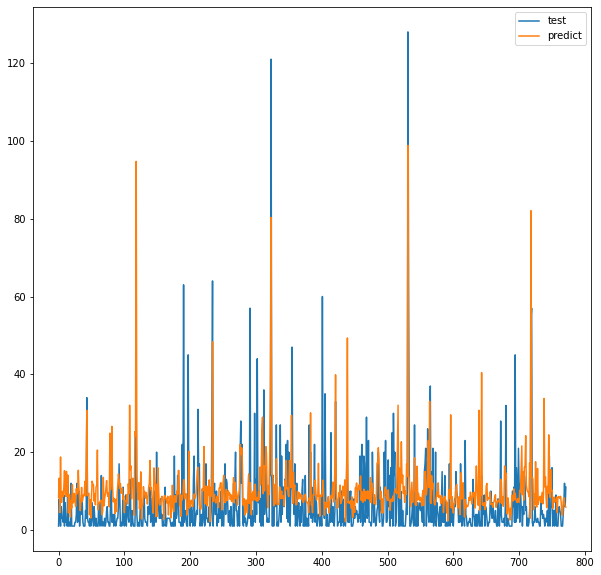

In [268]:
plt.figure(figsize=(10,10))
plt.plot(range(len(br.predict(X_test))),y_test,label='test')
plt.plot(range(len(br.predict(X_test))),br.predict(X_test),label='predict')
plt.legend()

ahora con lag

In [287]:
sales_cat_lag=sales_cat.copy()

In [288]:
for i in range(12):
    sales_cat_lag['CANTIDAD_{}'.format(i+1)]=sales_cat.groupby(['COLOR_POS','CATEGORIA','SUBCATEGORIA_POS','MATERIAL_POS','ESTILO','ACABADO'])[['CANTIDAD']].shift(i+1)

In [329]:
sales_cat_lag=sales_cat_lag.dropna()
sales_cat_lag=sales_cat_lag.reset_index(drop=True)


In [399]:
sales_cat_lag[sales_cat_lag['CANTIDAD']>45]['SUBCATEGORIA_POS'].value_counts()

SILLAS DE COMEDOR    32
SET 4P                8
MESAS DE CENTRO       3
SILLAS AUXILIARES     3
RECLINABLES           3
OTROS                 2
MESAS DE 4P           2
PUFF                  1
SOFA 3P               1
RECLINABLES 1P        1
Name: SUBCATEGORIA_POS, dtype: int64

<AxesSubplot:>

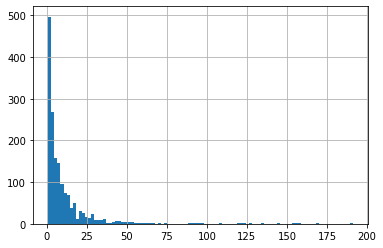

In [400]:
sales_cat_lag['CANTIDAD'].hist(bins=100)

In [358]:
num_var=['AREA','ALTO','DESCUENTO(%)','PRECIO']
for i in range(1,13):
    num_var.append('CANTIDAD_{}'.format(i))
num_var.append('CANTIDAD')
cat_var=['MES','Factor covid','PUESTOS','COLOR_POS','CATEGORIA','SUBCATEGORIA_POS','VIGENCIA','ORIGEN','ESTILO','MATERIAL_POS','ACABADO']

y=sales_cat_lag['CANTIDAD']

X_num=sales_cat_lag[num_var[:-1]].astype('float')
X_cat=sales_cat_lag[cat_var].astype('category')

X_cat_dummies=pd.get_dummies(X_cat)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_num_norm= scaler.fit_transform(X_num)


X=np.append(X_num_norm,X_cat_dummies,axis=1)

#split data till month 4 from 2021
index=sales_cat_lag[(sales_cat_lag.ANIO==2021) & (sales_cat_lag.MES==4)].head(1).index.values[0]
X_train=X[:index]
y_train=y[:index]
X_test=X[index:]
y_test=y[index:]


import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as mse

mod = sm.OLS(y_train, sm.add_constant(X_train))
res = mod.fit()
res.summary()




<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               CANTIDAD   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     28.68
Date:                Sat, 21 Aug 2021   Prob (F-statistic):          7.87e-242
Time:                        05:27:50   Log-Likelihood:                -5680.1
No. Observations:                1503   AIC:                         1.152e+04
Df Residuals:                    1421   BIC:                         1.196e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.793e+12   5.57e+13     -0.086      0.931   -1.14e+14    1.04e+14
x1             1.6979      6.352      0.267      0.789     -10.763      14.159
x2             3.3725      4.501      0.749      0.454      -5.457      12.202
x3             2.7715      2.256      1.229      0.219      -1.653       7.196
x4            -2.9584      4.607     -0.642      0.521     -11.997       6.080
x5            92.4329      4.959     18.641      0.000      82.706     102.160
x6            -8.4714      5.135     -1.650      0.099     -18.545       1.602
x7            14.8445      5.026      2.953      0.003       4.985      24.704
x8            11.6274      4.898      2.374      0.018       2.020      21.235
x9             5.3037      5.007      1.059      0.290      -4.518      15.126
x10            0.3602      4.870      0.074      0.941      -9.193       9.914
x11            3.4600      4.548      0.761      0.447      -5.461      12.381
x12           18.1115      4.423      4.095      0.000       9.435      26.788
x13           12.1893      4.341      2.808      0.005       3.675      20.704
x14            1.6919      4.328      0.391      0.696      -6.798      10.182
x15           10.5465      4.292      2.457      0.014       2.127      18.966
x16            9.9089      4.078      2.430      0.015       1.909      17.909
x17        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x18        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x19        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x20        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x21        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x22        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x23        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x24        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x25        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x26        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x27        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x28        -6.769e+11   7.86e+12     -0.086      0.931   -1.61e+13    1.47e+13
x29         7.626e+11   8.86e+12      0.086      0.931   -1.66e+13    1.81e+13
x30         7.626e+11   8.86e+12      0.086      0.931   -1.66e+13    1.81e+13
x31         7.626e+11   8.86e+12      0.086      0.931   -1.66e+13    1.81e+13
x32         7.626e+11   8.86e+12      0.086      0.931   -1.66e+13    1.81e+13
x33        -8.877e+11   1.03e+13     -0.086      0.931   -2.11e+13    1.93e+13
x34        -8.877e+11   1.03e+13     -0.086      0.931   -2.11e+13    1.93e+13
x35        -8.877e+11   1.03e+13     -0.086      0.931   -2.11e+13    1.93e+13
x3

In [355]:
X_test

array([[0.03318393, 0.36097561, 0.4194728 , ..., 0.        , 1.        ,
        0.        ],
       [0.18865116, 0.32682927, 0.70599467, ..., 0.        , 1.        ,
        0.        ],
       [0.28353488, 0.40487805, 0.76912378, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.32991121, 0.34146341, 0.6724683 , ..., 0.        , 1.        ,
        0.        ],
       [0.26797463, 0.37560976, 0.67409211, ..., 0.        , 1.        ,
        0.        ],
       [0.05419027, 0.35121951, 0.56056557, ..., 0.        , 1.        ,
        0.        ]])

In [395]:
y_predicted.sum()

475.8369140625

In [394]:
y_test.sum()

709

In [360]:
X_test

y_predicted=res.predict(sm.add_constant(X_test, has_constant='add'))
mse(y_test,y_predicted)


67.18850241210617

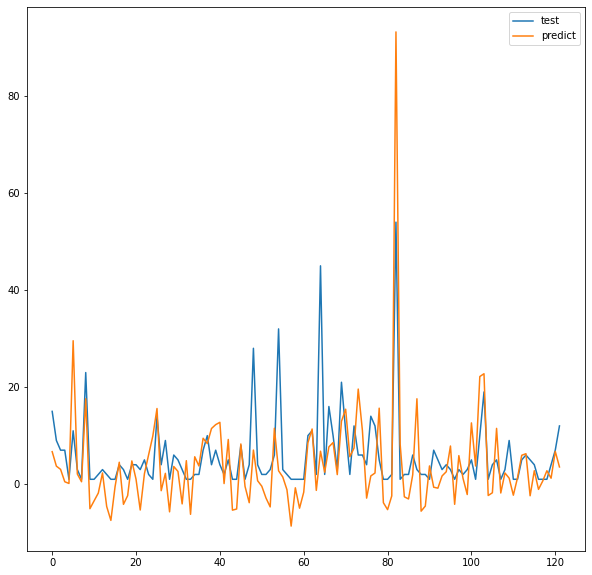

In [387]:
plt.figure(figsize=(10,10))
plt.plot(range(len(res.predict(sm.add_constant(X_test, has_constant='add')))),y_test,label='test')
plt.plot(range(len(res.predict(sm.add_constant(X_test, has_constant='add')))),res.predict(sm.add_constant(X_test, has_constant='add')),label='predict')
plt.legend()

In [361]:
y_predicted

array([ 6.68988037,  3.70843506,  3.04730225,  0.49310303,  0.14154053,
       29.56195068,  2.08294678,  0.49310303, 17.60784912, -5.05944824,
       -3.44049072, -1.83795166,  2.30029297, -4.60864258, -7.47070312,
       -0.50073242,  4.5135498 , -4.16186523, -2.36743164,  4.78820801,
        1.01751709, -5.3293457 ,  2.14611816,  6.05023193,  9.90716553,
       15.58581543, -1.35089111,  2.22943115, -5.70788574,  3.637146  ,
        2.61920166, -4.07208252,  4.83703613, -6.22003174,  5.64318848,
        3.75085449,  9.45843506,  8.37322998, 11.46673584, 12.26678467,
       12.74261475,  0.12054443,  9.20874023, -5.36486816, -5.12231445,
        8.28216553, -0.47094727, -3.82543945,  7.02429199,  0.70373535,
       -0.4362793 , -2.86108398, -4.69165039, 11.5177002 ,  2.75622559,
        1.47497559, -1.16143799, -8.64654541, -0.75299072, -4.9588623 ,
       -1.66363525,  8.53900146, 11.36444092, -1.28601074,  6.78753662,
        2.44354248,  7.67327881,  8.57678223,  1.96697998, 12.94

In [391]:
br=GradientBoostingRegressor(**{'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 30})

br.fit(X_train,y_train)



GradientBoostingRegressor(max_depth=4, n_estimators=30)

In [392]:
mse(y_test,br.predict(X_test))

111.27782443879526

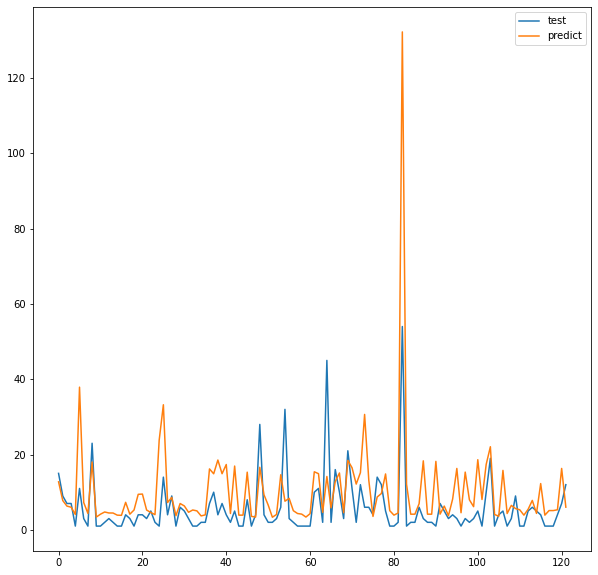

In [393]:
plt.figure(figsize=(10,10))
plt.plot(range(len(br.predict(X_test))),y_test,label='test')
plt.plot(range(len(br.predict(X_test))),br.predict(X_test),label='predict')
plt.legend()

In [396]:
br.predict(X_test).sum()

1229.243229729163

In [397]:
y_test.sum()

709

MOdelo sin sillas y aparte con sillas solas